In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Feature Selection and Combination

In [3]:
# Separate features to unique features and time series features
unique_cols = []
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == True:
        unique_cols.append(col)
    else:
        timeseries_cols.append(col)
# print(unique_cols)
# print(timeseries_cols)

# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    unique_cols.append(adjlist[i])
    timeseries_cols.remove(adjlist[i])
# print(unique_cols)
# print(timeseries_cols)

In [4]:
df_selected = df[unique_cols]
# display(df_selected)

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
Systolic = dict()
Diastolic = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, Systolic, Diastolic]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH', 'Systolic', 'Diastolic']

label_idx = 0

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    label_idx = label_idx + 1
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if count < 6:
                count = count + 1
            else:
                section = section + 1
                count = 1
            key = 'p'+str(section)
            item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_selected.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_selected.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_selected.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_selected = df_selected.fillna(0)
display(df_selected)


/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,CODPAX,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,CenterSizenpatients,Followup,ModalidadeDPInicial,Deathevent,...,Systolic_p4,Systolic_p5,Systolic_p6,Systolic_p7,Systolic_p8,Systolic_p9,Systolic_p10,Systolic_p11,Systolic_p12,Systolic_p13
0,1349037,12.933333,4.433333,5.300000,0,1,128,4.800000,0.0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1349040,14.000000,3.766667,5.933333,0,1,128,30.400000,0.0,0,...,129.0,133.333333,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1349048,11.833333,4.366667,6.100000,1,1,128,7.066667,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1349051,10.066667,4.733333,5.533333,1,1,128,19.700000,0.0,1,...,170.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1349055,11.933333,4.033333,4.066667,0,1,128,8.666667,0.0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,1,347,66,6.133333,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,347457071,9.700000,4.300000,3.233333,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,347457072,10.466667,4.433333,4.466667,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,347457073,11.766667,4.533333,3.566667,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

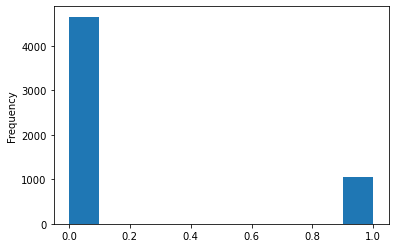

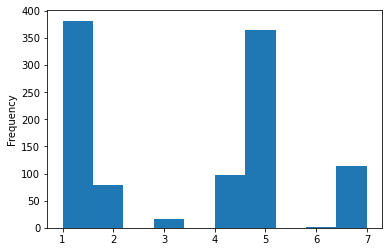

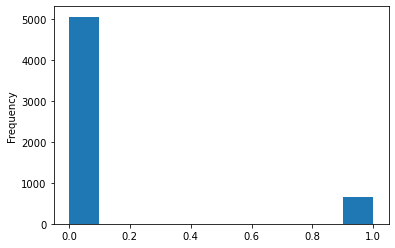

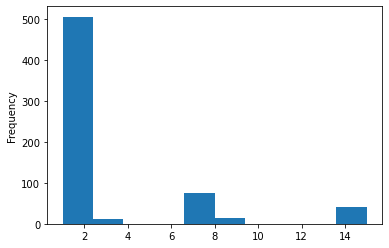

In [7]:
from matplotlib import pyplot as plt

plt.figure()
df_selected['Deathevent'].plot.hist()

plt.figure()
df_selected[df_selected['Deathevent']==1]["Causeofdeath"].plot.hist()

plt.figure()
df_selected['TechniqueFailureevent'].plot.hist()

plt.figure()
df_selected[df_selected['TechniqueFailureevent']==1]["Causeofdropout"].plot.hist()

# Predicting binary outcomes:

* Deathevent   
* TechniqueFailureevent

F1 score: 0.4074074074074074
F1 score: 0.3677419354838709
F1 score: 0.37575757575757573
F1 score: 0.3092105263157895
F1 score: 0.3409836065573771
Target: Deathevent, mean accuracy: 0.8238982918170222, mean f1-score: 0.36022021030440415


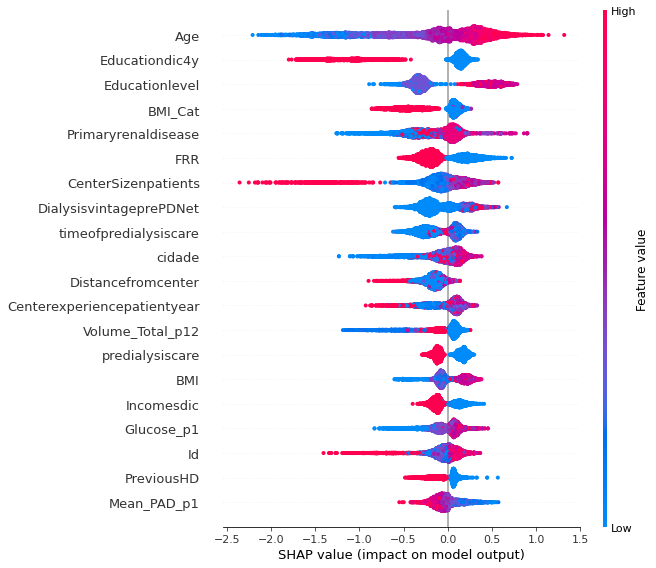

F1 score: 0.0437956204379562
F1 score: 0.06410256410256411
F1 score: 0.0625
F1 score: 0.028571428571428574
F1 score: 0.026666666666666665
Target: TechniqueFailureevent, mean accuracy: 0.8810241116420137, mean f1-score: 0.04512725595572311


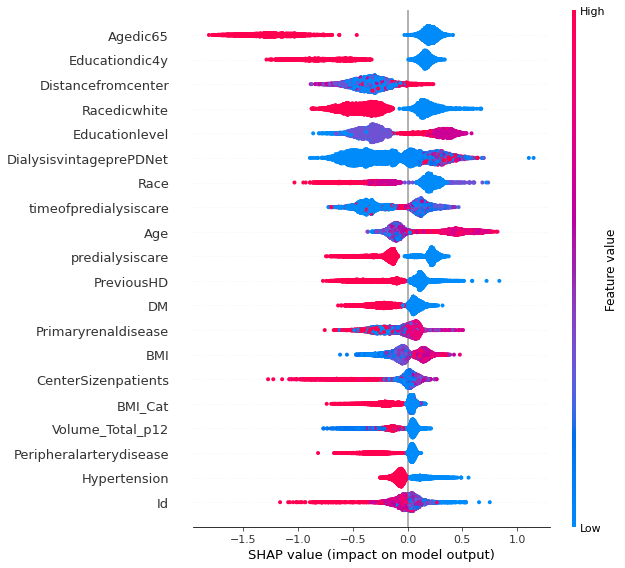

In [11]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    base_data = df_selected 

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=5)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score
        print(f"F1 score: {f1score}")

        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(shap_values, X_test)


In [30]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Federated Learning for prediction

* Deathevent   
* TechniqueFailureevent

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff

# Predicting multiclass outcomes:

* Causeofdeath   
* Causeofdropout

Target: Causeofdeath, mean accuracy: 0.3737145667531074, mean f1-score: 0.3737145667531074


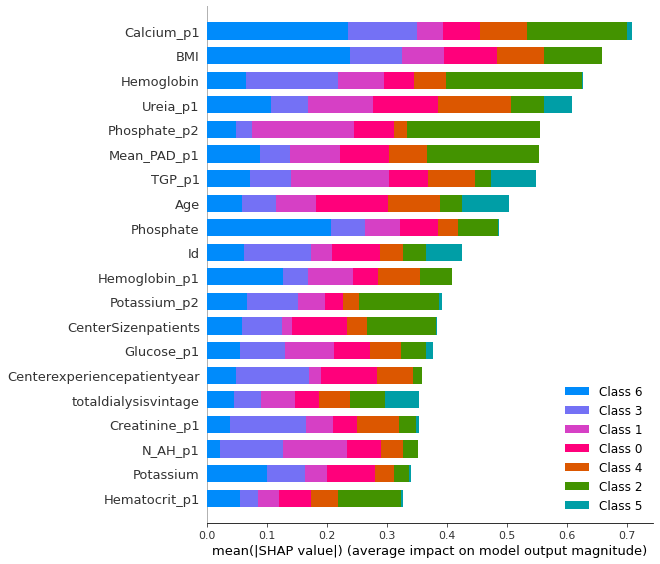

Target: Causeofdropout, mean accuracy: 0.5284068736923764, mean f1-score: 0.5284068736923764


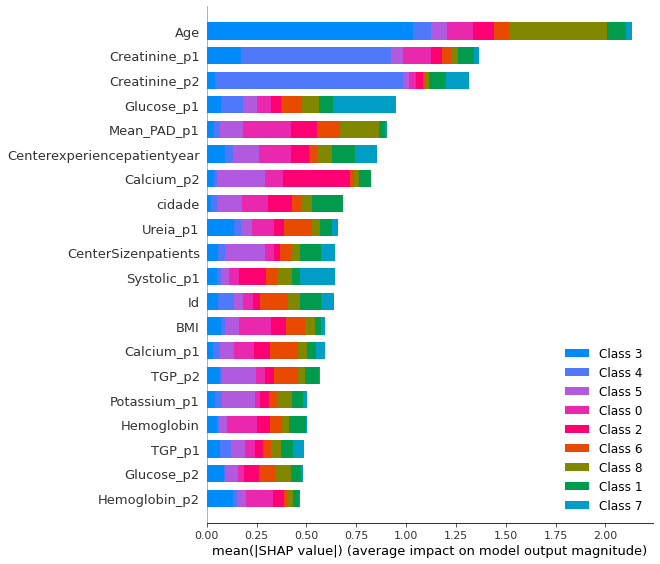

In [68]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=9,
            min_child_weight=4)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='micro')
#         print(f"F1 score: {f1score}")
#         shap.summary_plot(shap_values, X_test)
#         shap_values = np.array(shap_values)
#         print(shap_values.shape)
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
    new_shap_values = list()
    for i in range(shap_values.shape[0]):
        new_shap_values.append(shap_values[i])
    
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(new_shap_values, X_test)
    
#     # Split data into train and test subsets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, shuffle=True, random_state=None)
    
#     # Train XGBoost model
#     model = xgboost.XGBClassifier(
#         learning_rate =0.1,
#         max_depth=9,
#         min_child_weight=4)
#     model.fit(X_train, y_train)
    
#     # Use saved models
# #     filename = 'models/' + target + '_multiclass_model.pkl'
# #     model = pickle.load(open(filename, 'rb')) 

#     models.append(model)

#     y_pred = model.predict(X_test)
#     normalised_accuracy = accuracy_score(y_test, y_pred)

#     print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_test)
#     print(shap_values.shape)
#     print(X_test.shape)

#     shap.summary_plot(shap_values, X_test)

In [69]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.6026781722256997, mean f1-score: 0.2954635731418321


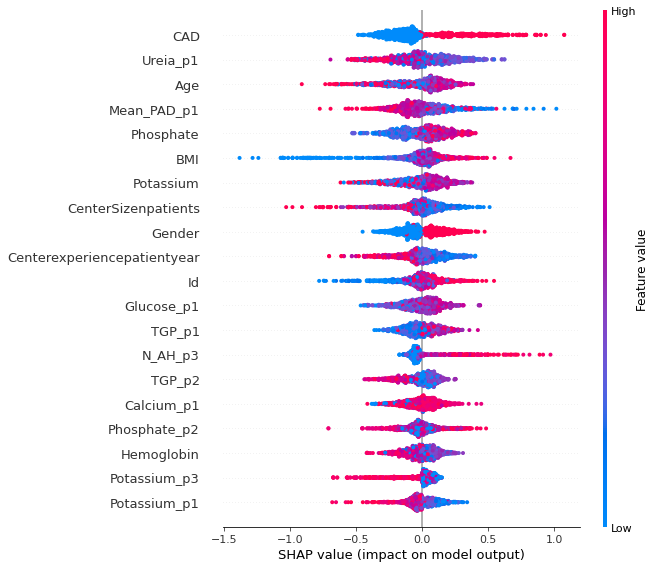

Target: Causeofdeath, Class: 2.0, mean accuracy: 0.924295806134311, mean f1-score: 0.0


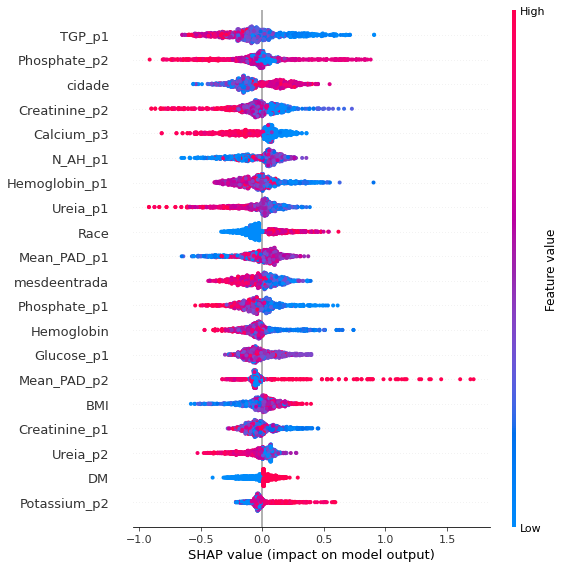

Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9839264955736386, mean f1-score: 0.0


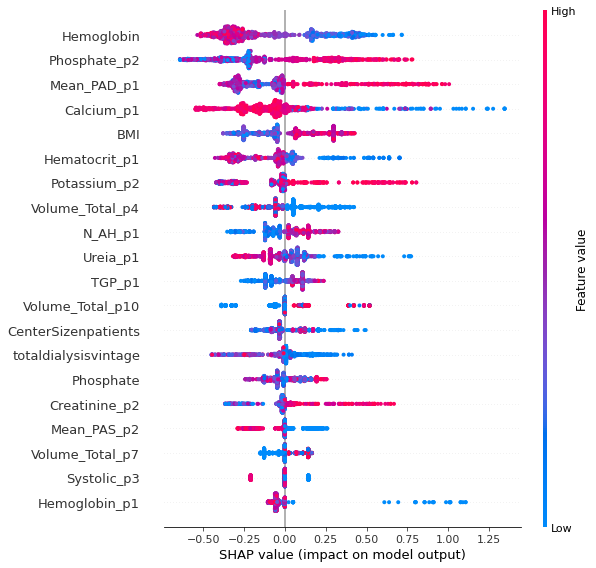

Target: Causeofdeath, Class: 4.0, mean accuracy: 0.9072878476258607, mean f1-score: 0.0


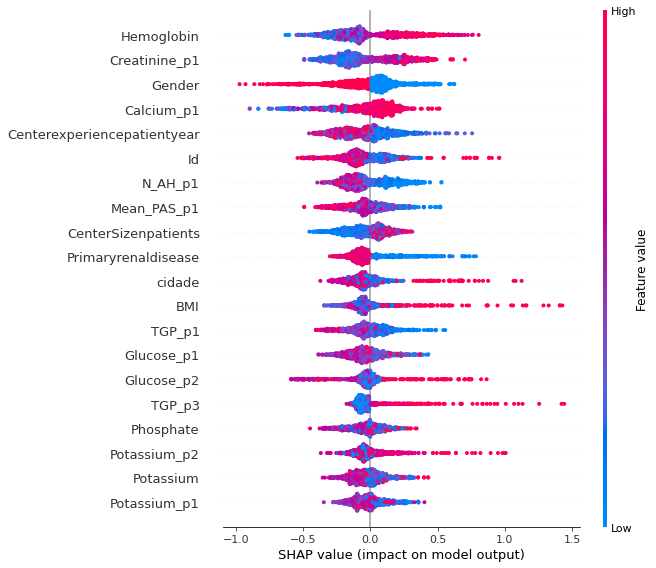

Target: Causeofdeath, Class: 5.0, mean accuracy: 0.6253509791648038, mean f1-score: 0.24324121050289277


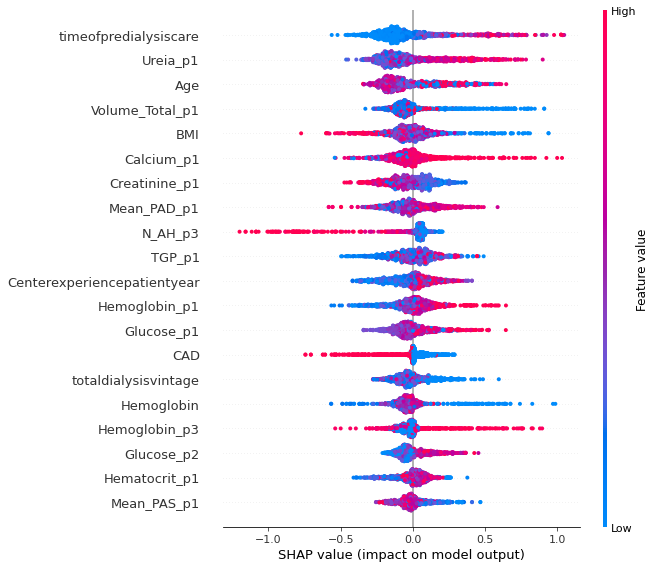

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9981087364750068, mean f1-score: 0.0


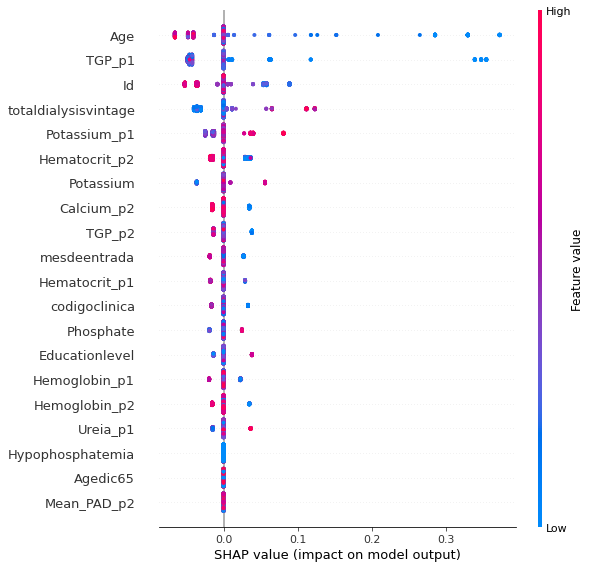

Target: Causeofdeath, Class: 7.0, mean accuracy: 0.8902575337565948, mean f1-score: 0.037037037037037035


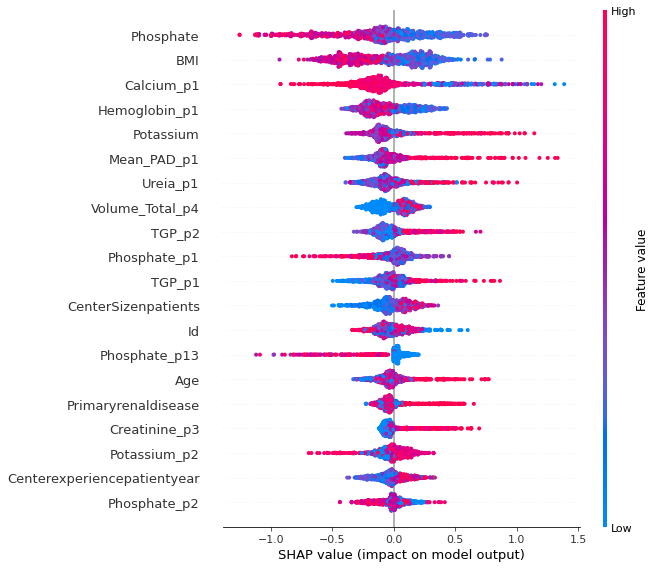

Target: Causeofdropout, Class: 1, mean accuracy: 0.945656926585016, mean f1-score: 0.030769230769230764


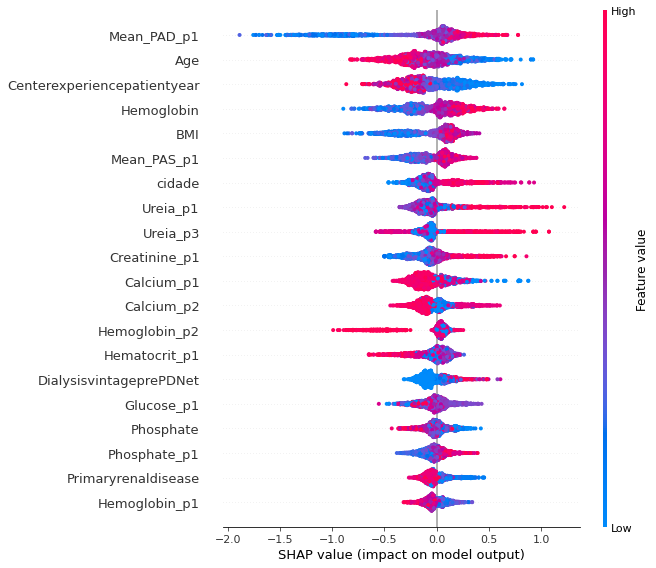

Target: Causeofdropout, Class: 2, mean accuracy: 0.8088495263170268, mean f1-score: 0.14122089617245534


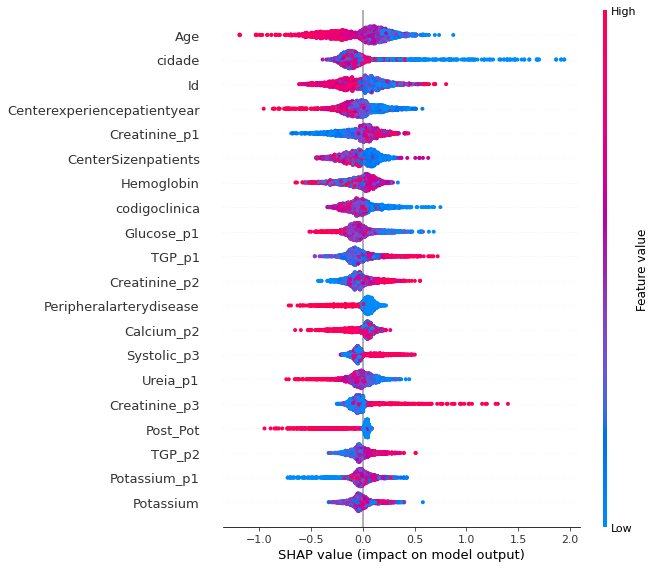

Target: Causeofdropout, Class: 3, mean accuracy: 0.9412973976821271, mean f1-score: 0.0


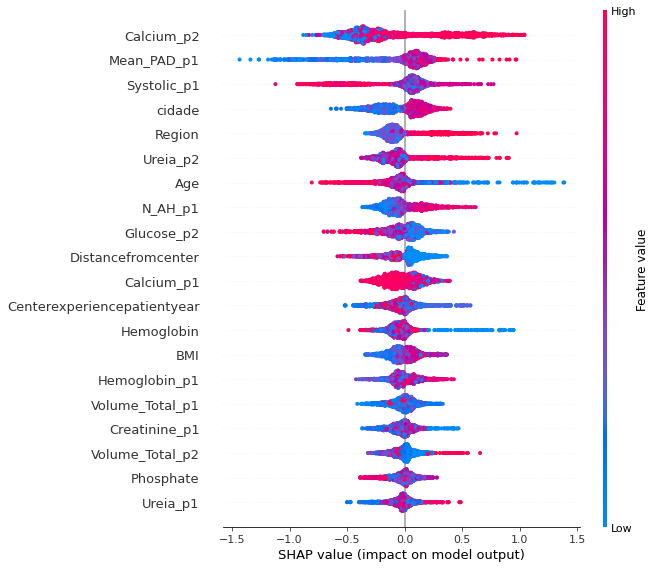

Target: Causeofdropout, Class: 4, mean accuracy: 0.9461376619102471, mean f1-score: 0.19997659541270088


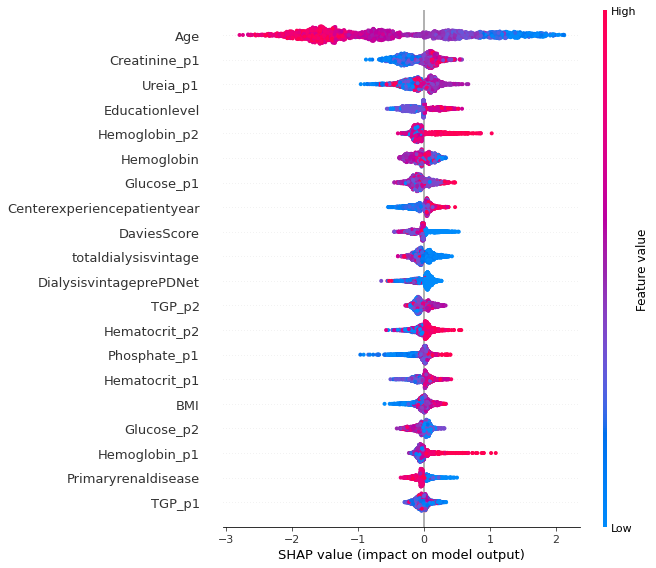

Target: Causeofdropout, Class: 5, mean accuracy: 0.9665177836808576, mean f1-score: 0.14679098679098676


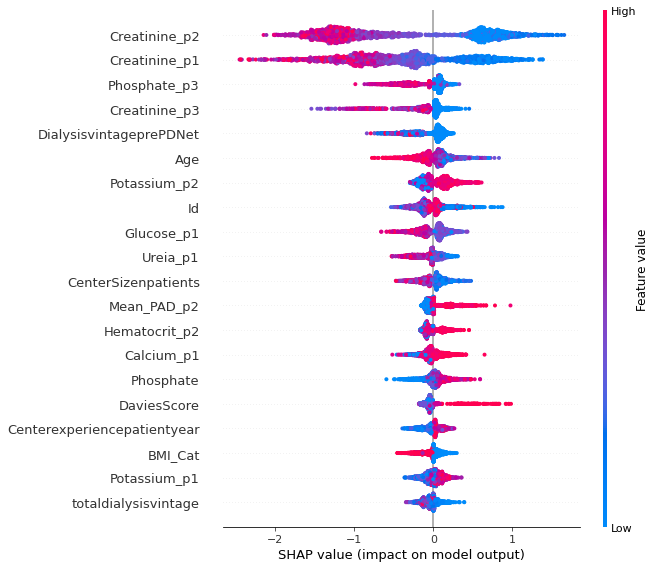

Target: Causeofdropout, Class: 6, mean accuracy: 0.9495380709466608, mean f1-score: 0.08704589757221337


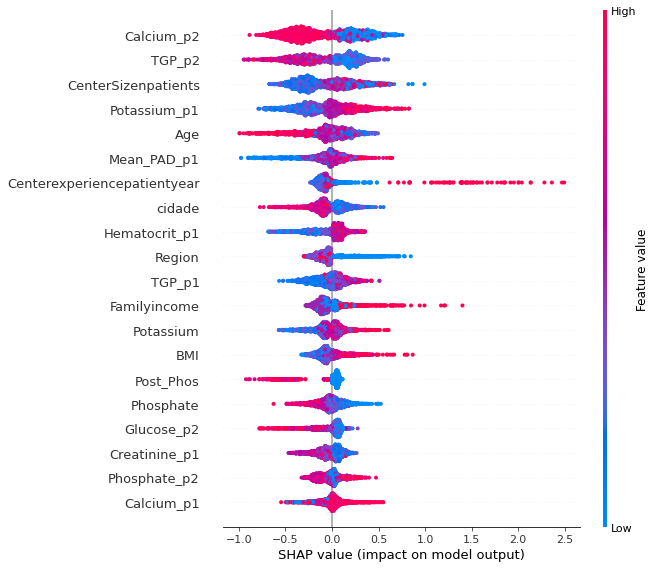

Target: Causeofdropout, Class: 7, mean accuracy: 0.9626460424551588, mean f1-score: 0.0


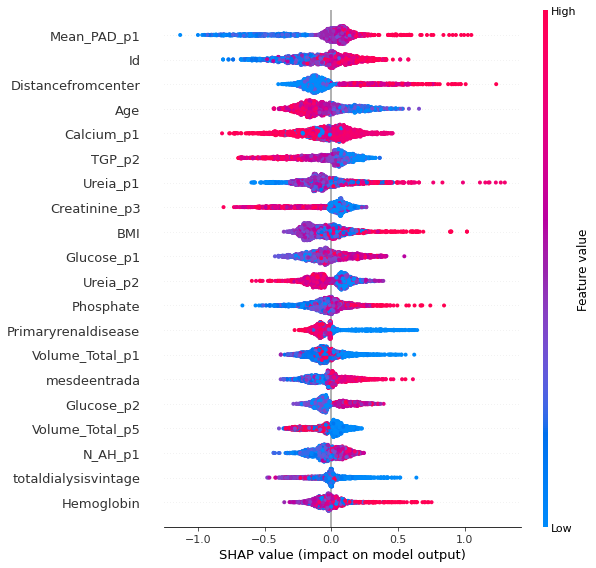

Target: Causeofdropout, Class: 8, mean accuracy: 0.9927207973859282, mean f1-score: 0.0


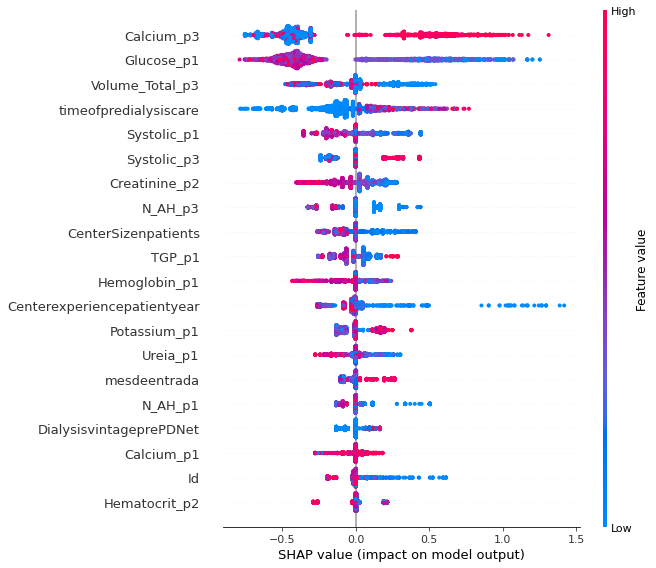

Target: Causeofdropout, Class: 10, mean accuracy: 0.6695785044312278, mean f1-score: 0.6862885349034895


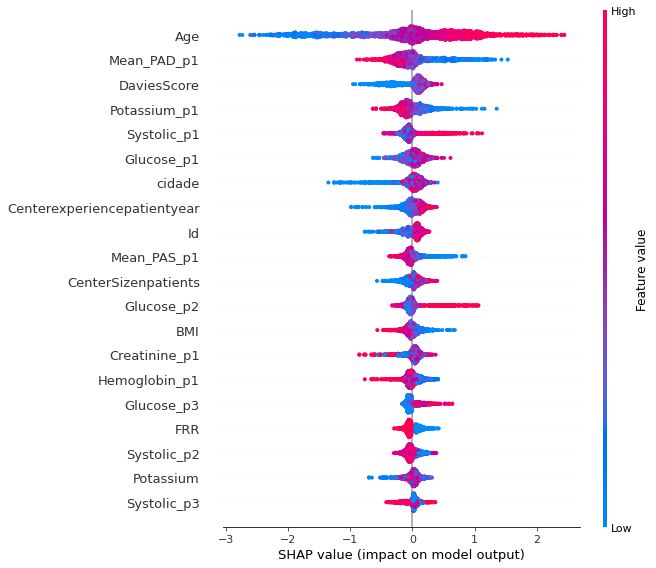

In [20]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1
        
        # apply k-fold cross validation
        k = 5
        kf = KFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        j = 0

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=9,
                min_child_weight=4)
            model.fit(X_train, y_train)

            # use saved model
#             filename = 'models/' + target + '_class' + str(classidx) + '_fold'+ str(j) + '_binary_model.pkl'
#             j = j + 1
#             model = pickle.load(open(filename, 'rb'))


            # explaining model
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            y_pred = model.predict(X_test)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
#             print(f"F1 score: {f1score}")
#             shap.summary_plot(shap_values, X_test)
#             print(shap_values.shape)

            # for each iteration we save the test_set index and the shap_values
            list_shap_values.append(shap_values)
            list_test_sets.append(test_index)
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            models.append(model)

        #combining results from all iterations
        test_set = list_test_sets[0]
        shap_values = np.array(list_shap_values[0])
        for i in range(0,len(list_test_sets)):
            test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
            shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

        #bringing back variable names    
        X_test = X.iloc[test_set,:]

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")

        shap.summary_plot(shap_values, X_test)
                
                
                
#         # Split data into train and test subsets
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, ybi, test_size=0.2, shuffle=True, random_state=None)
        
#         # Train XGBoost model
#         model = xgboost.XGBClassifier(
#             learning_rate =0.1,
#             max_depth=9,
#             min_child_weight=4)
#         model.fit(X_train, y_train)
        
            
#         # Use saved models
# #         filename = 'models/' + target + '_class' + str(classidx) + '_binary_model.pkl'
# #         model = pickle.load(open(filename, 'rb')) 
        
        
#         models.append(model)

#         y_pred = model.predict(X_test)
#         normalised_accuracy = accuracy_score(y_test, y_pred)
        
#         print("Binary classification for Class",classidx)
#         print(f"Target: {target}, accuracy: {normalised_accuracy}")

#         explainer = shap.TreeExplainer(model)
#         shap_values = explainer.shap_values(X_test)

#         shap.summary_plot(shap_values, X_test)

In [18]:
# Save predictive models
import pickle

i = 0
j = 0
model = None
for target in targets:
    classnum = classnumlist[i]
    for classidx in classnum:
        for ik in range(k):         
            filename = 'models/' + target + '_class' + str(classidx) + '_fold' + str(ik) + '_binary_model.pkl'
            model = models[j]
            with open(filename, 'wb') as file:  
                pickle.dump(model, file)
            j = j + 1
    i = i + 1

# Predicting binary outcomes for events in different years:


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [22]:
Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
Systolic = dict()
Diastolic = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, Systolic, Diastolic]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH', 'Systolic', 'Diastolic']

label_idx = 0

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    label_idx = label_idx + 1
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if count < 6:
                count = count + 1
            else:
                section = section + 1
                count = 1
            key = 'p'+str(section)
            item[key].append(col)
    label_idx = label_idx + 1

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]

for year in range(3):
    label_idx = 0
    for item in label_dict:
        if year == 0:
            p = 0
        elif year == 1:
            p = 2
        else:
            p = 4
        name = label_str[label_idx] + '_p' + str(p+1)
        dfs[year].loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
        label_idx = label_idx + 1


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            dfs[year].loc[:,index] = df[index]    
    dfs[year] = dfs[year].fillna(0)
        
# display(dfs[1])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Target: death_event_1y, mean accuracy: 0.9123887394073161, mean f1-score: 0.2539637710573449


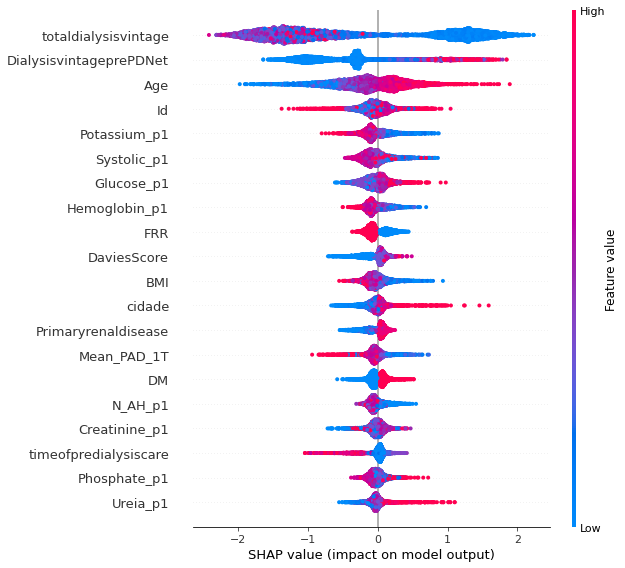

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup1y, mean accuracy: 1.0, mean f1-score: 1.0


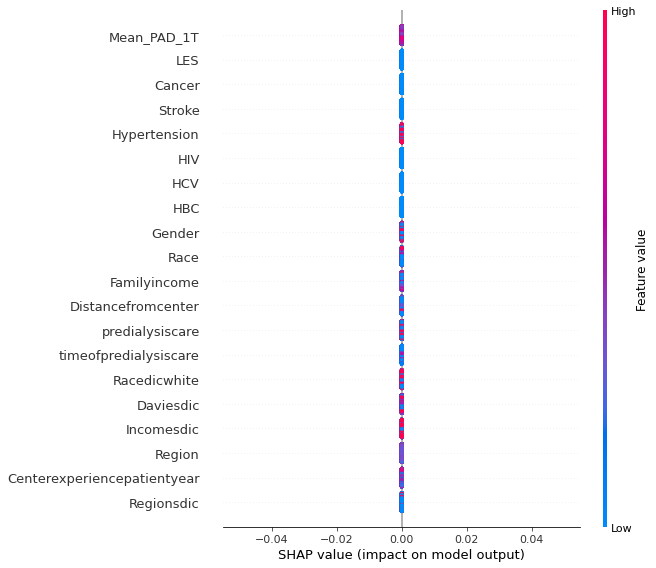

Target: Tech_event_1y, mean accuracy: 0.9500627003995327, mean f1-score: 0.00625


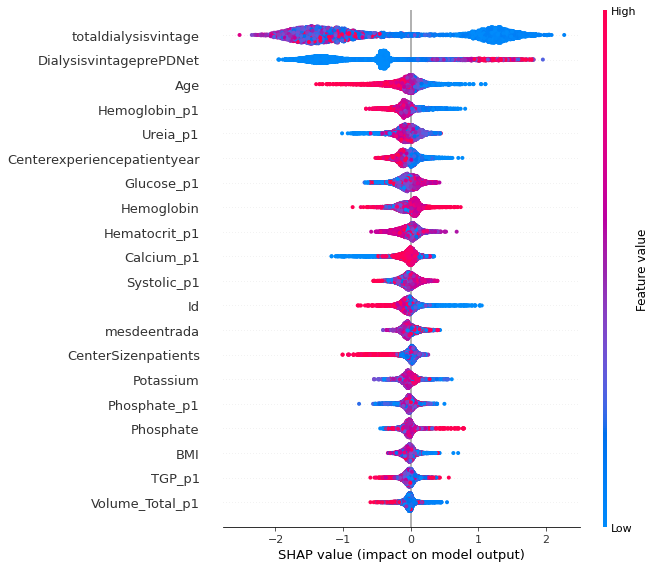

In [27]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    base_data = dfs[0].copy()

    if target == "Followup1y":
        temp = base_data[target]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = base_data[target]   
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(shap_values, X_test)

#     # Split data into train and test subsets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, shuffle=True, random_state=None)
    
#     # Train XGBoost model
#     model = xgboost.XGBClassifier(
#         learning_rate =0.1,
#         max_depth=8,
#         min_child_weight=3)
#     model.fit(X_train, y_train)
    
#     # Use saved models
# #     filename = 'models/' + target + '_binary_model.pkl'
# #     model = pickle.load(open(filename, 'rb'))   

#     models.append(model)

#     y_pred = model.predict(X_test)
#     normalised_accuracy = accuracy_score(y_test, y_pred)

#     print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_test)

#     shap.summary_plot(shap_values, X_test)

In [28]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_2y, mean accuracy: 0.9416746871992301, mean f1-score: 0.17887170530511387


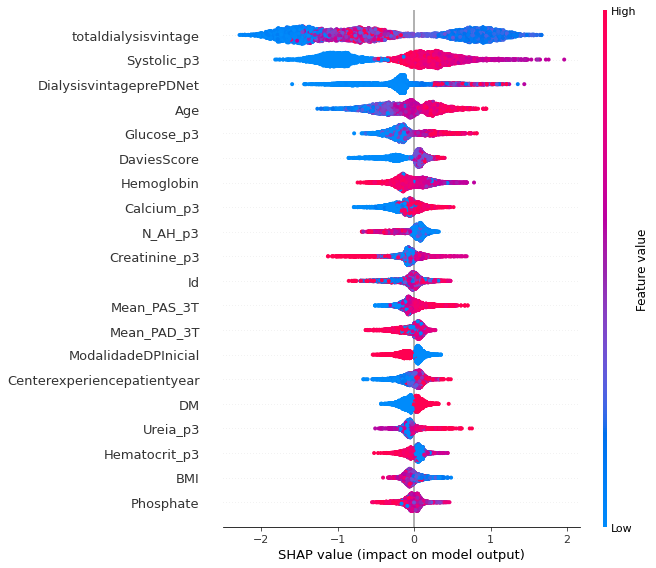

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup2y, mean accuracy: 0.9921158660406348, mean f1-score: 0.9931106046244291


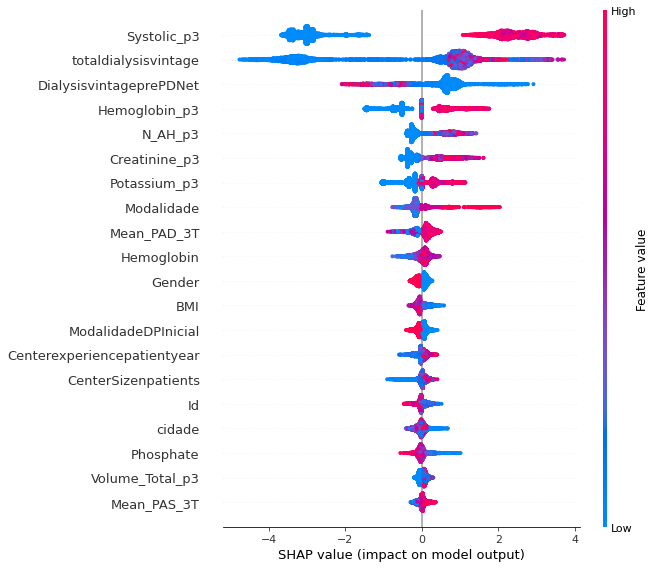

Target: Tech_event_2y, mean accuracy: 0.9606189675064931, mean f1-score: 0.009756097560975608


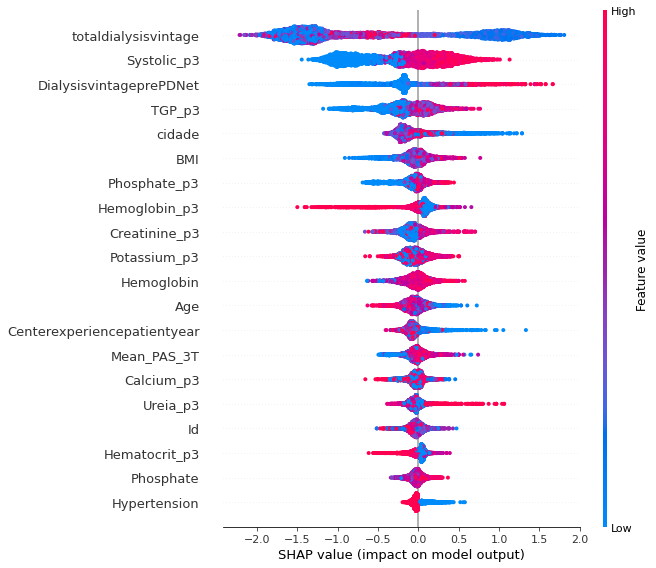

In [29]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    base_data = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] == 0].index
    base_data.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = base_data["Followup2y"] - base_data["Followup1y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = base_data[target]
        
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(shap_values, X_test)
    
#     # Split data into train and test subsets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, shuffle=True, random_state=None)
    
#     # Train XGBoost model
#     model = xgboost.XGBClassifier(
#         learning_rate =0.1,
#         max_depth=8,
#         min_child_weight=3)
#     model.fit(X_train, y_train)
    
#     # Use saved models
# #     filename = 'models/' + target + '_binary_model.pkl'
# #     model = pickle.load(open(filename, 'rb'))   

#     models.append(model)

#     y_pred = model.predict(X_test)
#     normalised_accuracy = accuracy_score(y_test, y_pred)

#     print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_test)

#     shap.summary_plot(shap_values, X_test)

In [30]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_3y, mean accuracy: 0.9685071574642127, mean f1-score: 0.11928178540754605


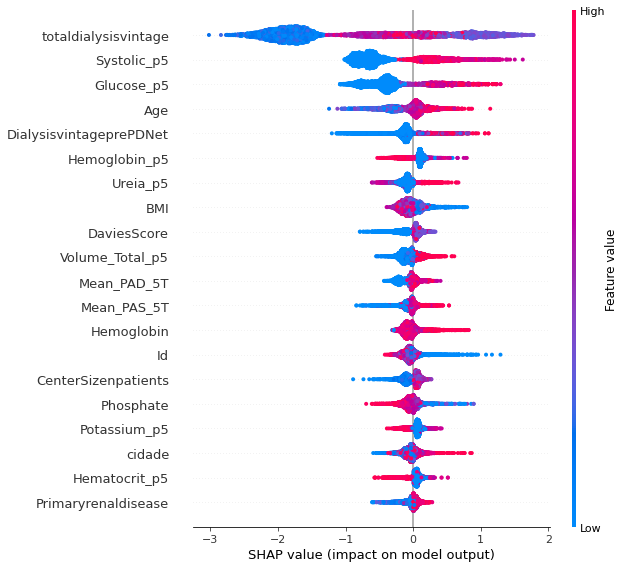

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup3y, mean accuracy: 0.9930229456936589, mean f1-score: 0.9927000244370827


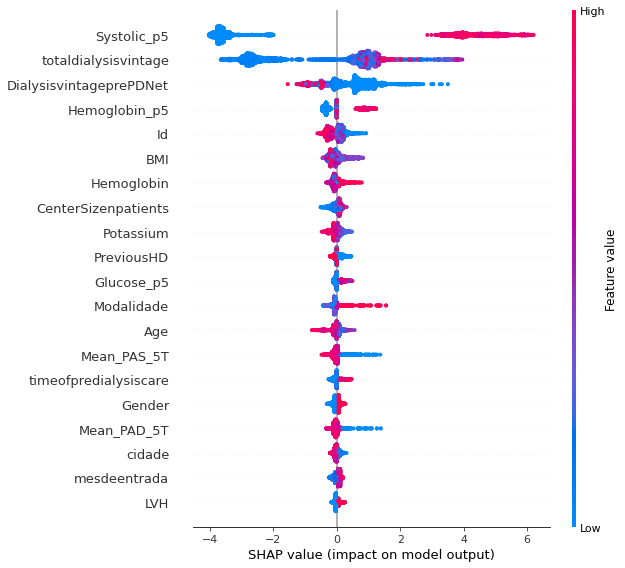

Target: Tech_event_3y, mean accuracy: 0.9824120997624096, mean f1-score: 0.0


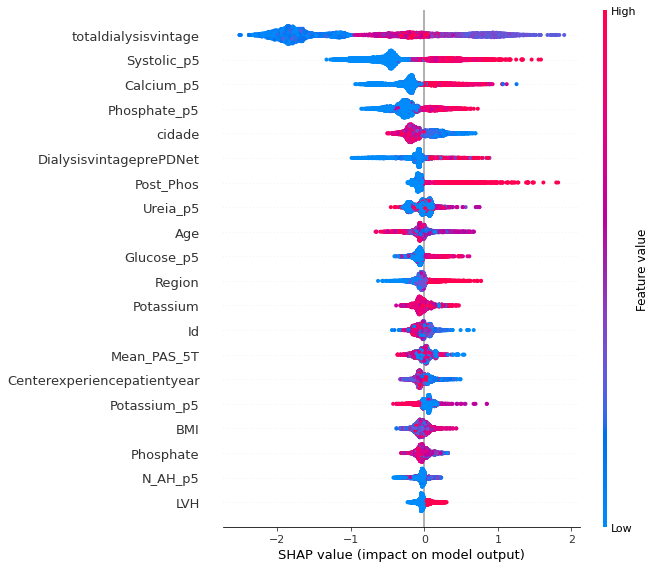

In [31]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    base_data = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup1y"] == 0) | (df["Followup2y"] - df["Followup1y"] == 0)].index
    base_data.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = base_data["Followup3y"] - base_data["Followup2y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = base_data[target]

    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(shap_values, X_test)
    
#     # Split data into train and test subsets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, shuffle=True, random_state=None)
    
#     # Train XGBoost model
#     model = xgboost.XGBClassifier(
#         learning_rate =0.1,
#         max_depth=8,
#         min_child_weight=3)
#     model.fit(X_train, y_train)
    
#     # Use saved models
# #     filename = 'models/' + target + '_binary_model.pkl'
# #     model = pickle.load(open(filename, 'rb'))   

#     models.append(model)

#     y_pred = model.predict(X_test)
#     normalised_accuracy = accuracy_score(y_test, y_pred)

#     print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_test)

#     shap.summary_plot(shap_values, X_test)

In [32]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1